## Desafio

Criar um mapa coroplético com a média de valor do imóvel para cada distrito da cidade de São Paulo e inserir tooltips com dados estatísticos.

Primeiramente, vamos importar as bibliotecas `geopandas`, `pandas` e `folium` para executar o desafio.

In [1]:
import geopandas as gpd
import folium
import pandas as pd

Agora vamos fazer a leitura dos dados:

In [2]:
dados_sp = gpd.read_file('/content/geometria_sp.shp')
estatisticas_dist = pd.read_csv('/content/estatisticas_dist_sp.csv')

Vamos utilizar o método `head()` para explorar as duas bases de dados:

In [3]:
dados_sp.head()

,NM_DIST,geometry
0,Alto de Pinheiros,"POLYGON ((-46.72921 -23.54973, -46.73018 -23.5..."
1,Anhanguera,"POLYGON ((-46.80745 -23.45373, -46.80756 -23.4..."
2,Aricanduva,"POLYGON ((-46.52236 -23.58478, -46.52260 -23.5..."
3,Artur Alvim,"POLYGON ((-46.48595 -23.55433, -46.48613 -23.5..."
4,Barra Funda,"POLYGON ((-46.68561 -23.52338, -46.68563 -23.5..."


In [4]:
estatisticas_dist.head()

,NM_DIST,preco_min,preco_medio,preco_max,qtd_imoveis,area_min,area_max
0,Alto de Pinheiros,300000,1.766567e+06,3720000,21,39,310
1,Anhanguera,900000,9.000000e+05,900000,2,120,120
2,Aricanduva,235000,3.732157e+05,900000,19,45,83
3,Artur Alvim,175000,2.468407e+05,580000,27,33,153
4,Barra Funda,250000,1.080059e+06,3540000,17,42,204


O `GeoDataFrame` armazenado em `dados_sp` contém a geometria e o nome de cada distrito de São Paulo.

O `DataFrame` armazenado em `estatisticas_dist` contém o nome de cada distrito e as seguintes estatísticas:

- Preço mínimo, médio e máximo dos imóveis no distrito;
- Quantidade de imóveis no distrito;
- Área mínima e máxima dos imóveis no distrito.

---

Vamos criar agora uma visualização inicial dos distritos de São Paulo usando o método `plot()` da biblitoeca `GeoPandas`:

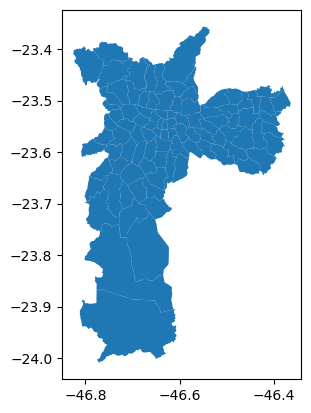

In [5]:
dados_sp.plot();

Obtivemos os contornos dos distritos e também é possível localizar a latitude e longitude da cidade de São Paulo. Vamos utilizar o valor -23.7 para a latitude e -46.6 para a longitude.

Agora podemos usar a biblioteca `Folium` para criar um mapa coroplético.

O primeiro passo é gerar uma visualização do mapa de base, centralizado em -23.7 e -46.6, com zoom inicial de 10 e a camada de visualização 'cartodbpositron'.

Depois disso, vamos usar o método `Choropleth()` para gerar o mapa coroplético. Aqui vai uma explicação para os principais parâmetros:

- `geo_data`: Dados geográficos obtidos a partir do `GeoDataFrame` `dados_sp`;
- `data`: Dados numéricos obtidos a partir do `DataFrame` `estatisticas_dist`;
- `columns`: Colunas utilizadas dos dados numéricos. A primeira coluna deve conter os nomes dos distritos, que servirá como chave para unir a informação geográfica, e a segunda coluna representa a informação numérica a ser representada nas cores;
- `key_on`: Caminho da coluna chave nos dados de geometria a partir de um json.

In [6]:
mapa_sp = folium.Map(location = [-23.7, -46.6],
                      zoom_start = 10,
                      tiles = 'cartodbpositron')

folium.Choropleth(geo_data = dados_sp,
                  data= estatisticas_dist,
                  columns = ['NM_DIST', 'preco_medio'],
                  key_on = 'feature.properties.NM_DIST',
                  fill_color = 'YlOrRd',
                  nan_fill_color = 'white',
                  bins = 10,
                  highlight = True,
                  legend_name = 'Média do valor do imóvel').add_to(mapa_sp)

mapa_sp

Output hidden; open in https://colab.research.google.com to view.

Agora vamos seguir para a etapa adicional do desafio, que é inserir tooltips com as estatísticas de cada distrito da cidade de São Paulo.

Primeiro, devemos agrupar a informação de geometria no conjunto de dados de estatística para utilizar o método `GeoJson()` com esses dados.

In [7]:
estatisticas_dist = gpd.GeoDataFrame(estatisticas_dist.merge(dados_sp, on = 'NM_DIST', how = 'left'))
estatisticas_dist

,NM_DIST,preco_min,preco_medio,preco_max,qtd_imoveis,area_min,area_max,geometry
0,Alto de Pinheiros,300000,1.766567e+06,3720000,21,39,310,"POLYGON ((-46.72921 -23.54973, -46.73018 -23.5..."
1,Anhanguera,900000,9.000000e+05,900000,2,120,120,"POLYGON ((-46.80745 -23.45373, -46.80756 -23.4..."
2,Aricanduva,235000,3.732157e+05,900000,19,45,83,"POLYGON ((-46.52236 -23.58478, -46.52260 -23.5..."
3,Artur Alvim,175000,2.468407e+05,580000,27,33,153,"POLYGON ((-46.48595 -23.55433, -46.48613 -23.5..."
4,Barra Funda,250000,1.080059e+06,3540000,17,42,204,"POLYGON ((-46.68561 -23.52338, -46.68563 -23.5..."
...,...,...,...,...,...,...,...,...
84,Vila Matilde,210000,4.394838e+05,750000,37,34,140,"POLYGON ((-46.53259 -23.54319, -46.53317 -23.5..."
85,Vila Medeiros,265000,4.041278e+05,650000,38,41,82,"POLYGON ((-46.59123 -23.49983, -46.59156 -23.4..."
86,Vila Prudente,205000,6.250302e+05,2098000,29,35,155,"POLYGON ((-46.57900 -23.59952, -46.57899 -23.5..."
87,Vila Sônia,189900,8.243598e+05,3000000,50,32,420,"POLYGON ((-46.75131 -23.61098, -46.75132 -23.6..."


Agora podemos estilizar os contornos e preenchimento para dar destaque na região que está sendo selecionada com o cursor do mouse e depois inserir os tooltips com o uso do método `GeoJsonTooltip()`.

Ao final, acrescentamos essa configuração no topo da visualização com o método `keep_in_front()` e geramos um arquivo HTML da visualização.

In [8]:
style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.5,
                                'weight': 0.1}

config = folium.features.GeoJson(
    estatisticas_dist,
    style_function = style_function,
    highlight_function= highlight_function,
    tooltip = folium.features.GeoJsonTooltip(
        fields=['NM_DIST', 'preco_min', 'preco_medio', 'preco_max', 'qtd_imoveis', 'area_min', 'area_max'],
        aliases=['Distrito: ', 'Preço mínimo: ', 'Preço médio: ', 'Preço máximo: ', 'Quantidade de imóveis', 'Área mínima: ', 'Área máxima: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")

    )
)

mapa_sp.add_child(config)
mapa_sp.keep_in_front(config)

mapa_sp.save('mapa_sp.html')
mapa_sp

Output hidden; open in https://colab.research.google.com to view.